In [1]:
%pylab inline
rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import ndimage
import numpy

In [3]:
teapot_0_m1_1 = ndimage.imread("./photometric_stereo/teapot_0_-1_1.png")[:, :, 0] / 255.0
teapot_1_1_1 = ndimage.imread("./photometric_stereo/teapot_1_1_1.png")[:, :, 0] / 255.0
teapot_m1_1_1 = ndimage.imread("./photometric_stereo/teapot_-1_1_1.png")[:, :, 0] / 255.0

teapotHeight = teapot_0_m1_1.shape[0]
teapotWidth = teapot_0_m1_1.shape[1]

teapotIntensities = numpy.zeros(shape = (teapotHeight, teapotWidth, 3))
for x in range(teapotHeight):
    for y in range(teapotWidth):
        teapotIntensities[x][y] = [teapot_0_m1_1[x][y], teapot_1_1_1[x][y], teapot_m1_1_1[x][y]]

In [4]:
teapotLightDirections = numpy.array([
    [0., -1., 1.],
    [1., 1., 1.],
    [-1., 1., 1.]
])

In [5]:
def photometricStereo(intensities, lightDirections):
    inversedLightDirections = numpy.linalg.inv(lightDirections)
    
    height = intensities.shape[0]
    width = intensities.shape[1]    
    
    result = np.zeros(shape = (height, width, 3))
    for x in range(height):
        for y in range(width):
            result[x][y] = inversedLightDirections.dot(intensities[x][y])
    
    return result

In [6]:
teapotNormal = photometricStereo(teapotIntensities, teapotLightDirections)

In [7]:
def scale(normalImage):
    height = normalImage.shape[0]
    width = normalImage.shape[1]
    
    result = numpy.zeros(shape = normalImage.shape)
    
    for x in range(height):
        for y in range(width):
            ratio = max(0.00001, normalImage[x][y][2])
            
            red = normalImage[x][y][0] / ratio
            red = max(red, 0.)
            red = min(red, 1.)
            
            green = normalImage[x][y][1] / ratio
            green = max(green, 0.)
            green = min(green, 1.)
            
            blue = 0.
            
            result[x][y] = [red, green, blue]
    
    return result

In [8]:
teapotResult = scale(teapotNormal)

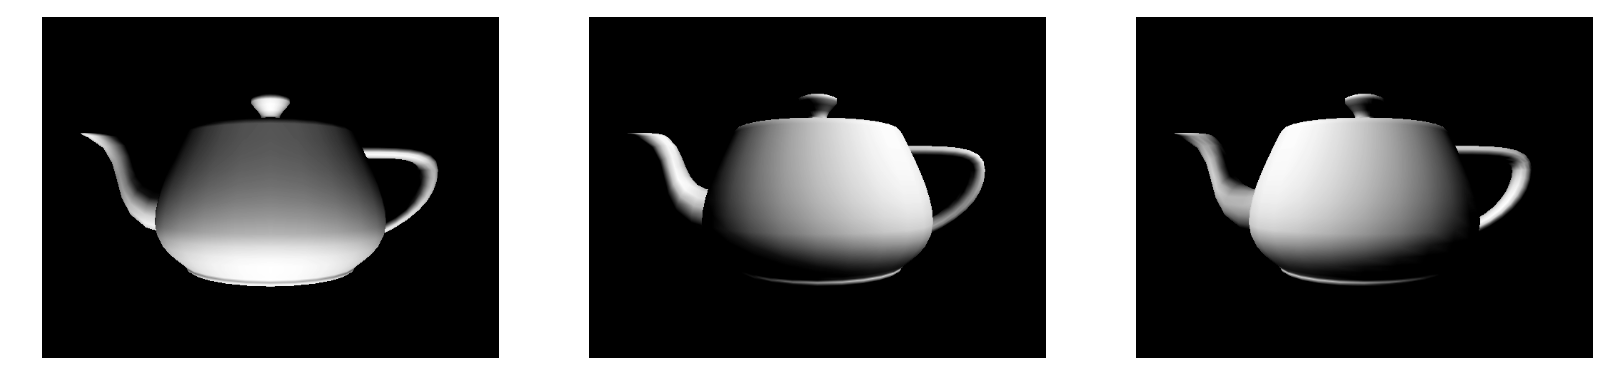

In [9]:
pyplot.subplot(1, 3, 1)
pyplot.axis('off')
pyplot.imshow(teapot_0_m1_1, cmap="gray")

pyplot.subplot(1, 3, 2)
pyplot.axis('off')
pyplot.imshow(teapot_1_1_1, cmap="gray")

pyplot.subplot(1, 3, 3)
pyplot.axis('off')
pyplot.imshow(teapot_m1_1_1, cmap="gray")

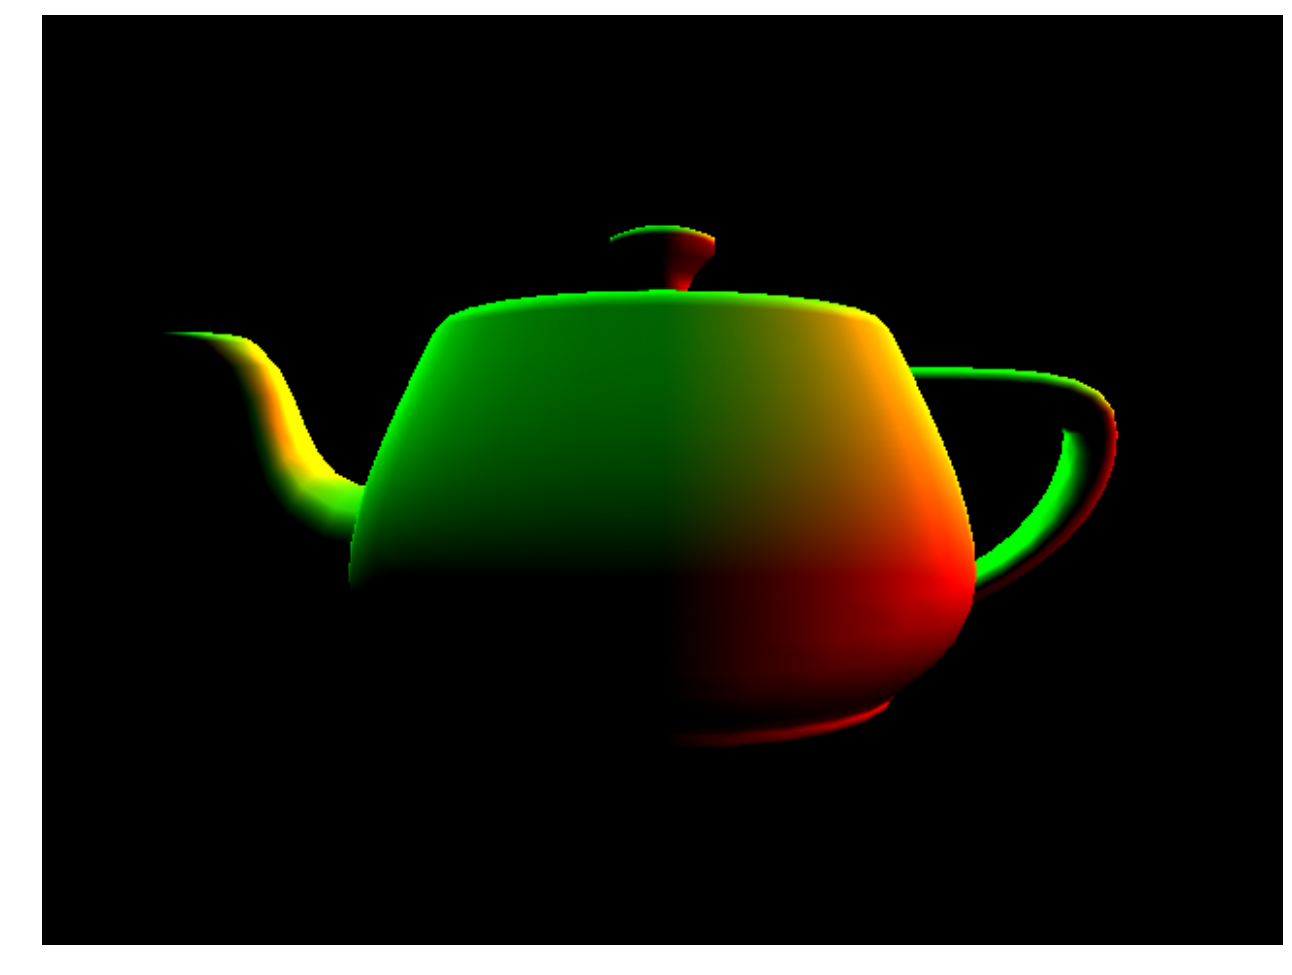

In [10]:
pyplot.axis('off')
pyplot.imshow(teapotResult)